In [2]:
import rasterio
from os import listdir
from os.path import isfile, join
import fiona
import rasterio
import rasterio.mask

In [85]:
path = 'D:/rambabu_r@nrsc.gov.in/STUDY/MTECH/IIST GeoInformatics Text books/1 SEM/RS/Labs/Object based classifi'

In [86]:
files = [f for f in listdir(path) if isfile(join(path,f))]
print(files[0:3])

['LC08_L1TP_144048_20221031_20221108_02_T1_B2.TIF', 'LC08_L1TP_144048_20221031_20221108_02_T1_B3.TIF', 'LC08_L1TP_144048_20221031_20221108_02_T1_B4.TIF']


In [87]:
# reading the metadata of first file
with rasterio.open(path+'/'+files[3]) as src0:
    meta = src0.meta
    meta.update(count = len(files[0:3]))

In [89]:
#read each layer and write it to stack
with rasterio.open('Object_Cls_1.tiff', "w",**meta) as dst:
        for id, layer in enumerate (files[0:3], start = 1):
            print(path+'/'+layer)
            with rasterio.open(path+'/'+layer) as src1:
                dst.write_band(id, src1.read(1))

D:/rambabu_r@nrsc.gov.in/STUDY/MTECH/IIST GeoInformatics Text books/1 SEM/RS/Labs/Object based classifi/LC08_L1TP_144048_20221031_20221108_02_T1_B2.TIF
D:/rambabu_r@nrsc.gov.in/STUDY/MTECH/IIST GeoInformatics Text books/1 SEM/RS/Labs/Object based classifi/LC08_L1TP_144048_20221031_20221108_02_T1_B3.TIF
D:/rambabu_r@nrsc.gov.in/STUDY/MTECH/IIST GeoInformatics Text books/1 SEM/RS/Labs/Object based classifi/LC08_L1TP_144048_20221031_20221108_02_T1_B4.TIF


In [6]:
import geopandas as gpd
# Read file from Shapefile
fp = "ICRISAT.shp"
data = gpd.read_file(fp)


C:\Users\RAMBABU\anaconda3\lib\site-packages\geopandas\_compat.py:111: UserWarning: The Shapely GEOS version (3.11.0-CAPI-1.17.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [24]:
data

,Name,descriptio,timestamp,begin,end,altitudeMo,tessellate,extrude,visibility,drawOrder,icon,geometry
0,ICRISAT,None,None,None,None,None,1,0,-1,None,None,"LINESTRING Z (78.28409 17.51480 0.00000, 78.28..."


In [7]:
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
#coordinate systems and conversions
data_1 = data.to_crs("EPSG:32644")

In [9]:
data_1.crs

<Derived Projected CRS: EPSG:32644>
Name: WGS 84 / UTM zone 44N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 78°E and 84°E, northern hemisphere between equator and 84°N, onshore and offshore. China. India. Kazakhstan. Kyrgyzstan. Nepal. Russian Federation. Sri Lanka.
- bounds: (78.0, 0.0, 84.0, 84.0)
Coordinate Operation:
- name: UTM zone 44N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [22]:
import pandas as pd 
from pandas import MultiIndex, Int16Dtype
data_1.to_file('dataframe.shp')  

C:\Users\RAMBABU\anaconda3\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [16]:
raster = rasterio.open('Object_Cls_1.tiff')

In [23]:
data_1

,Name,descriptio,timestamp,begin,end,altitudeMo,tessellate,extrude,visibility,drawOrder,icon,geometry
0,ICRISAT,None,None,None,None,None,1,0,-1,None,None,"LINESTRING (211622.040 1938563.826, 211604.403..."


In [25]:
raster.crs

CRS.from_epsg(32644)

In [26]:
data_1.crs

<Derived Projected CRS: EPSG:32644>
Name: WGS 84 / UTM zone 44N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 78°E and 84°E, northern hemisphere between equator and 84°N, onshore and offshore. China. India. Kazakhstan. Kyrgyzstan. Nepal. Russian Federation. Sri Lanka.
- bounds: (78.0, 0.0, 84.0, 84.0)
Coordinate Operation:
- name: UTM zone 44N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
raster.crs

CRS.from_epsg(32644)

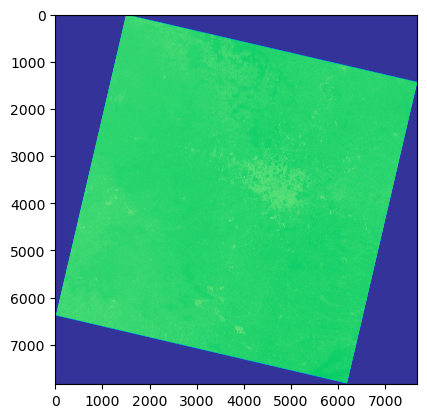

<AxesSubplot:>

In [41]:
import rasterio
from matplotlib import pyplot
import fiona
import rasterio.mask
from rasterio import mask
from rasterio.plot import show
import matplotlib as mpl
from descartes import PolygonPatch
band = rasterio.open('Object_Cls.tiff')
show(band.read(1), cmap='terrain')

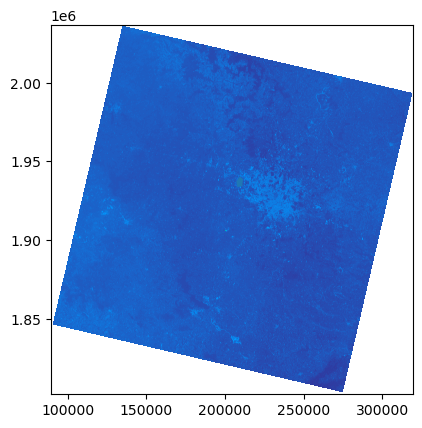

<AxesSubplot:>

In [50]:
with fiona.open("boundary.shp", "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]
    
patches = [PolygonPatch(feature,fc='#998999',ec='#000000',fill=False,zorder=1)for feature in shapes]
ax = mpl.pyplot.gca()

ax.add_collection(mpl.collections.PatchCollection(patches))

show(band,cmap='terrain')

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


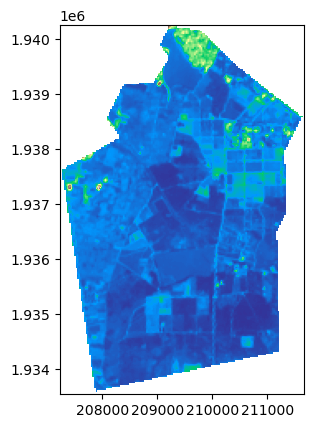

<AxesSubplot:>

In [48]:
with fiona.open("boundary.shp", "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]
    out_image, out_transform = rasterio.mask.mask(band, shapes, crop=True)
    out_meta = band.profile.copy()

out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

print(out_image)

with rasterio.open("masked_6.tif", "w", **out_meta) as dst:
    dst.write(out_image)
    
show(rasterio.open('masked_6.tif'),cmap='terrain')

In [74]:
from osgeo import gdal
import rasterio
import numpy as np
import matplotlib.pyplot as plt
dinom = nir+red
numer = nir-red
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [77]:
ndvi = np.where(dinom==0.0, 0.0, numer/dinom)

In [79]:
#checking the NDVI values inbetween -1 to +1
ndvi.flatten().max()

1.0

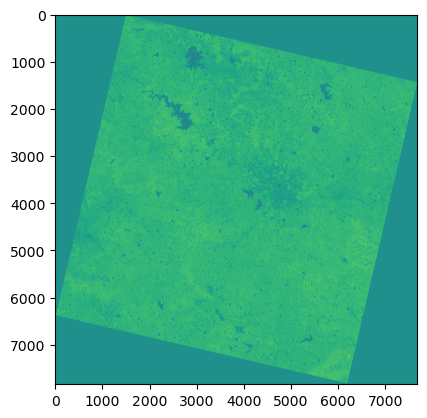

In [80]:
plt.figure()
plt.imshow(ndvi)

In [82]:
#writing the NDVI to file
out_meta = LST.meta.copy()

out_meta.update({'driver':'GTiff',
                 'width':LST.shape[1],
                 'height':LST.shape[0],
                 'count':1,
                 'dtype':'float64',
                 'crs':LST.crs, 
                 'transform':LST.transform,
                 'nodata':0})

In [83]:

with rasterio.open(fp=r'NDVI.tif', #outputpath_name
             mode='w',**out_meta) as dst:
             dst.write(ndvi, 1) # the numer one is the number of bands

with rasterio.open(fp=r'NDVI.tif', # outputpath_name
             mode='w',**out_meta) as dst:
             dst.write_band(1,ndvi) # the numer one is the number of bands